In [1]:
import sentencepiece as spm

In [2]:
fname = '/scratche/home/apoorv/transformer-kgc/data/wikidata5m_v2/train.txt'
f = open(fname)
train_inputs = []
for line in f:
    line = line.split('\t')
    train_inputs.append(line[0])
f.close()

In [3]:
len(train_inputs)

42687362

In [4]:
train_inputs[:10]

['|tail|Lalit Kumar Goel|||instance of',
 '|head|human|||instance of',
 '|tail|Ugo Riccarelli|||languages spoken, written or signed',
 '|head|Italian|||languages spoken, written or signed',
 '|tail|Road to Paradise|||director',
 '|head|William Beaudine|||director',
 '|tail|Robert van der Horst|||country of citizenship',
 '|head|Kingdom of the Netherlands|||country of citizenship',
 '|tail|Wesley Pionteck Souza|||member of sports team',
 '|head|Santos F.C.|||member of sports team']

In [10]:
import random
num_samples = 2000000
sample_for_sp_training = random.sample(train_inputs, num_samples)

In [11]:
sp_data_fname = '/scratche/home/apoorv/transformer-kgc/data/wikidata5m_v2/lines_for_sp_training.txt'
f = open(sp_data_fname, 'w')
for line in sample_for_sp_training:
    f.write(line + '\n')
f.close()

In [12]:
# now train using reduced sample
# training performed using command line python

# vocab_size = 32000
# user_defined_symbols = ['|head|', '|tail|', '|||']
# sp = spm.SentencePieceTrainer.train(input=sp_data_fname,
#                                model_prefix='sp_wd5m_v2', 
#                                vocab_size=vocab_size, 
#                                user_defined_symbols=user_defined_symbols,
#                                model_type='BPE',
#                                pad_id=3)

In [2]:
sp = spm.SentencePieceProcessor(model_file='data/sentencepiece/sp_wd5m_v2.model')

In [16]:
train_inputs[0]

'|tail|Lalit Kumar Goel|||instance of'

In [11]:
sp.encode("|head|x86_64|||platform")

[31895, 4, 31934, 8053, 0, 5183, 6, 921]

In [8]:
sp.id_to_piece(31895)

'▁'

In [13]:
# x = "Who's Got the 10½?"
x = "Felicia´s svenska suite"
x = "___"
x = "|head|x86_64|||platform"
x = "8½"
x = "Greatest Hits… So Far!!!"
sp.decode([sp.encode(x)])

['Greatest Hits... So Far!!!']

In [17]:
# e2wdid = get_entity_wd_id_dict('data/wikidata5m/aliases.txt')
entity_names = []
fname = "/scratche/prod/apoorv/wd5m_aliases_entities_v2.txt"
f = open(fname)
for line in f:
    line = line.rstrip().split('\t')
    entity_names.append(line[1])

In [21]:
from tqdm.auto import tqdm
i = 0
for e in tqdm(entity_names):
    tokenized = sp.encode(e)
    if 0 in tokenized:
        print(i, e)
    i+= 1

  0%|          | 0/4818679 [00:00<?, ?it/s]

159 UTC±00:00
427 UTC−05:00
838 UTC−03:00
934 seiyū
1005 Appletons' Cyclopædia of American Biography
1038 UTC−06:00
1503 1911 Encyclopædia Britannica
1597 Unterelsaß
1671 Ōsaka
1994 Côte-d’Or
2144 UTC−04:00
2226 Ōsaka Prefecture
2452 Łódź
2690 Grêmio Foot-Ball Porto Alegrense
2800 Kleť Observatory
3247 İzmir
3257 Powązki Cemetery
3915 Powązki Military Cemetery
4232 UTC−07:00
4336 Žďár nad Sázavou District
4552 Bærum
4705 Plzeň
4760 Újpest FC
4828 Beşiktaş J.K.
4901 ŠK Slovan Bratislava
5131 Nîmes Olympique
5365 UTC−08:00
5370 Bo′Bo′
5409 Nîmes
5421 Ōizumi Observatory
5459 Province of Ávila
5599 Gençlerbirliği S.K.
5698 Società Polisportiva Ars et Labor
5708 Widzew Łódź
5913 ŁKS Łódź
5962 9×19mm Parabellum
6068 FK Borac Čačak
6127 Gimnàstic de Tarragona
6242 Havlíčkův Brod District
6357 Gießen
6384 Lee - Korean family name (이)
6510 Ústí nad Orlicí District
6527 Győri ETO FC
6534 Shkodër
6540 Co′Co′
6791 Örebro
6892 České Budějovice
6894 České Budějovice District
6973 Jindřichův Hradec D

37404 Gmina Brześć Kujawski
37649 Schwarz-Weiß Essen
37704 Gmina Zaniemyśl
37743 Quảng Nam
37747 Gmina Rogoźno
37836 Gmina Żmigród
38011 Bærum SK
38032 Fußball-Bayernliga
38058 Gmina Belsk Duży
38195 Črnomelj
38228 FK Šiauliai
38254 Gmina Mała Wieś
38284 Gmina Góra Świętej Małgorzaty
38306 HC Plzeň
38338 Gmina Mieścisko
38440 Friedrich Kayßler
38445 HŠK Građanski Zagreb
38485 Lushnjë
38508 Říčany
38514 Gmina Grudziądz
38546 Žarko
38547 Gmina Trąbki Wielkie
38551 Seattle Storm - amerikanischer Fußballverein
38558 Zdravko Čolić
38587 Beşiktaş
38610 Gmina Żmudź
38621 SSV Ulm 1846 Fußball
38661 Gmina Zławieś Wielka
38753 Recep Tayyip Erdoğan
38790 Ángel Magaña
38798 Gmina Aleksandrów, Łódź Voivodeship
38831 canton of Villers-Cotterêts
38854 Žďár nad Sázavou
38888 Gmina Łęczyce
39055 Gmina Koźminek
39074 Gmina Żółkiewka
39113 Gmina Opatów, Świętokrzyskie Voivodeship
39172 Siemianowice Śląskie
39266 Gmina Chodzież
39298 7.62×54mmR
39322 Torneo Argentino Β
39435 Gmina Zaręby Kościelne
39451 G

64274 Žitorađa
64334 Gmina Niedźwiada
64344 Gmina Świerzawa
64371 canton of Saint-Benoît-du-Sault
64401 CS Chênois
64440 Antonio Sabàto Jr.
64449 Figaro qua, Figaro là
64595 Gmina Łapy
64629 Te Rangi Hīroa
64726 Sëlva
64747 Gmina Lądek
64806 Tramin an der Weinstraße
64825 Rîșcani District
64888 Santhià
64980 Gmina Grabów nad Prosną
65034 Louise Marie Adélaïde de Bourbon
65081 Gmina Świętajno, Olecko County
65086 Gonaïves
65107 ???????
65108 Passeig de Gràcia
65146 Liu - Chinese surname 柳
65180 Quo Vadis?
65200 Kuldīga
65220 Saint-Hilaire-du-Harcouët
65228 Gmina Lipowiec Kościelny
65315 Chikao Ōtsuka
65397 Třešť
65425 Delirious?
65436 Wągrowiec County
65447 Totò cerca moglie
65504 Ilmtal-Weinstraße
65543 Městečko Trnávka
65550 Gmina Łopiennik Górny
65560 Gmina Kąkolewnica
65564 Alcoià
65636 The Naked Gun 2½: The Smell of Fear
65691 Saint-Nicolas-lès-Cîteaux
65756 Kalākaua
65776 Gmina Cielądz
65926 Ähtäri
66014 Gmina Woźniki
66036 Gmina Dąbie, Lubusz Voivodeship
66083 Týniště nad Orlicí


86951 Ózd
87000 Māori - indigenous Polynesian people of New Zealand
87022 Gmina Ujście
87095 Kněžmost
87155 Niederrœdern
87185 È arrivato il cavaliere!
87396 Oëlleville
87421 Åmot
87504 Łask County
87514 Bouxières-aux-Chênes
87521 Volyně
87549 Saint-Saëns
87568 Rahačoŭ
87679 Çay
87683 S.A.S. à San Salvador
87684 Ümit
87709 Menorca Bàsquet
87765 Līhuʻe
87812 Žanna Juškāne
87823 Hetman Zamość
87829 Dragoslav Šekularac
87876 Raïs M'Bolhi
87889 Žleby
87921 Gmina Świerczów
87956 Marigny-le-Cahouët
88066 Dammartin-en-Goële
88089 Peut-être
88152 Gmina Świątki
88226 Ryū Murakami
88264 Øivind
88266 Šempeter pri Gorici
88372 Stalingrad: Dogs, Do You Want to Live Forever?
88473 Soběslav I, Duke of Bohemia
88565 Åtvidaberg Municipality
88681 Fëanor
88753 Želetava
88763 Lyons-la-Forêt
88834 Šaľa District
88835 B*Witched
88851 Knattspyrnufélag Fjallabyggðar
88887 Tartu Ülikool Korvpallimeeskond
88921 Henry the Younger of Poděbrady
88957 Fußball-Oberliga
89016 Guînes
89153 Where Do We Go from Here?
8

110654 Trans-la-Forêt
110656 Åke Fridell
110675 Örkelljunga Municipality
110681 Aïn Témouchent Province
110752 Hōchū Ōtsuka
110753 Myślibórz
110883 Niccolò III d'Este
110919 Michaël Citony
111009 Němčovice
111028 ŽRK Vardar
111070 Barberà del Vallès
111076 Shūhei
111096 Palau-solità i Plegamans
111166 Bechyně
111282 Safiyyah bint ‘Abd al-Muttalib
111359 Àger
111498 1985–86 Fußball-Bundesliga
111786 Jesper Grønkjær
111850 Are We Men or Corporals?
111873 Oleg Șișchin
111880 Žebrák
111892 Ángel Javier Arizmendi
111940 Savigné-l'Évêque
111946 2004–05 Fußball-Bundesliga
111992 Žihobce
112025 Murat Hacıoğlu
112102 Paul Arnaud de Foïar
112106 Ghardaïa Province
112132 1981–82 Fußball-Bundesliga
112238 Lázně Bělohrad
112276 Tōhoku-Chūō Expressway
112331 Kõo Rural Municipality
112332 Nová Říše
112402 1970–71 Fußball-Bundesliga
112450 Alexandru Bălțoi
112461 Who's Harry Crumb?
112465 Why Change Your Wife?
112576 Woman's Love—Woman's Suffering
112580 Nový Knín
112597 Ichikawa - Japanese family nam

125652 Kazlų Rūda
125810 Älvsjö AIK
125988 Neuilly-l'Évêque
126017 Shu'ba Ibn al-Ḥajjāj
126027 Lalœuf
126062 À Nous la Liberté
126078 Saïd Makasi
126088 Gmina Łubniany
126338 Emanuele Calaiò
126398 Rælingen
126402 Nastja Čeh
126403 Nishi-Kyūshū Line
126422 Álvaro Luiz Maior de Aquino
126482 bağlama
126493 Albocàsser
126560 Skarżysko County
126795 Đakovo
126842 Tanger-Tétouan-Al Hoceïma
126881 Çeşme
126887 Rožmitál na Šumavě
126919 Feridun Zaimoğlu
126924 Le Gué-de-la-Chaîne
127071 Özgürcan Özcan
127099 GÍ Gøta
127111 Initial D - manga by Shūichi Shigeno and the television anime series
127156 Vladimir Đilas
127174 Herálec - village in Žďár nad Sázavou District of Vysočina region
127192 Mark Švets
127225 Jaroslav Drobný
127228 Gmina Miedźna
127247 Tauragė County
127271 House of Kalākaua
127344 Lluçà
127347 Miguel Ángel Cuéllar
127358 Fernando Álvez
127447 SK Líšeň
127463 Dario Šimić
127475 Kaliště
127532 Kampen om Næsbygård
127572 Zoë Wanamaker
127730 Joël Tchami
127733 Abu Nu`aym
127751

151115 Jean-Noël Rey
151119 Juan Pablo Úbeda
151129 Pîtres
151301 Miloš Jevđević
151375 Le farò da padre
151414 Dýšina
151441 Klæbu
151467 Ángel Garasa
151481 Ferzan Özpetek
151557 Iida - Japanese family name (飯田)
151610 Ümit Davala
151639 Hostouň
151648 Civry-la-Forêt
151656 Beaumont-Pied-de-Bœuf - commune in Mayenne, France
151676 Kličaŭ District
151742 Doraemon: Nobita and the Island of Miracles—Animal Adventure
151748 Hans W. Geißendörfer
151797 Dídac Vilà
151846 Šlapanov
151907 Hankyū Kyōto Main Line
151976 Escaudœuvres
151990 Daşoguz Region
152014 Óscar Pérez Bovela
152058 Miloš Đalac
152063 Petr Jarchovský
152123 Kırşehir
152170 Marco Weißhaupt
152184 Anette Støvelbæk
152190 Courgeoût
152204 Antoni Tàpies
152211 Chūshingura: Hana no Maki, Yuki no Maki
152291 Świebodzice
152355 Buštěhrad
152468 Ősi
152501 Soběkury
152514 Spytihněv II, Duke of Bohemia
152604 Jan Åge Fjørtoft
152706 Álvaro Peña
152746 Chotěšice
152750 Konec básníků v Čechách
152843 Jonathan Zaccaï
152853 Martiněves

179440 Fırat Kocaoğlu
179472 Neusäß
179493 Gmina Radomyśl Wielki
179501 Greußenheim
179506 Anton Šoltis
179541 Åbo IFK
179548 Anna Murià
179549 Gylfi Sigurðsson
179575 Æthelswith
179601 Michał Gołaś
179658 Nikola Žigić
179847 Älvkarleby Municipality
179914 Rumi Ōkubo
179967 Bayrampaşaspor
179981 Gmina Świerklaniec
179982 Auch ich war nur ein mittelmäßiger Schüler
179993 Ivan Franěk
180078 Nguyễn Tiến Minh
180080 Vaira Vīķe-Freiberga
180115 Ángel Aranda
180124 Méndez Álvaro
180137 Predrag Šimić
180179 What the Bleep Do We Know!?
180182 Villedieu-les-Poêles-Rouffigny
180204 A.S.D. Nardò Calcio
180210 Tombebœuf
180259 Frymburk - village in Klatovy District of Plzeň region
180304 Lo vedi come sei... lo vedi come sei?
180347 Branko Šegota
180375 Rogério Corrêa
180379 Ricardo Vaz Tê
180390 Vitālijs Astafjevs
180422 Žichlínek
180451 And When Did You Last See Your Father?
180472 Čejetice
180499 Muğlaspor
180504 Sedat Ağçay
180541 Quảng Ninh - district of Vietnam
180545 Ourouër
180549 Æthelberh

206664 Liù Bosisio
206738 Křelovice - village in Plzeň-sever District of Plzeň region
206769 Arsenal Česká Lípa
206775 Salif Keïta
206801 Újezd - village in Beroun District of Central Bohemian region
206804 Célia Šašić
206817 Benoît Angbwa
206854 Ángel Pindado
206861 Álex Pérez
206876 Ōsaki - town in Soo district, Kagoshima prefecture, Japan
206898 Balli Kombëtar
206948 Vlastějovice
206963 Holger Gaißmayer
206970 Dětřichov
207049 Útvina
207079 Nadějov
207096 Pavel Novotný
207105 Richū
207129 Paulius Galaunė
207133 Miloš Lačný
207158 Aleksandar Aranđelović
207162 Albertine, baroness Staël von Holstein
207216 Těmice
207232 Melicuccà
207273 Fabio Daprelà
207292 Ørestad Station
207309 Róża
207375 Edin Šaranović
207384 Srđa Trifković
207449 Gábor Erős
207476 Yenişehir
207512 Kněždub
207530 Píšť
207537 Miguel Ángel Luque
207632 Claudiu Vîlcu
207641 Kerem İnan
207649 Sandis Prūsis
207690 Longecourt-lès-Culêtre
207691 Ülenurme Rural Municipality
207707 Šumvald
207736 Änis Ben-Hatira
207774 Duš

220015 Hošťalovice
220023 Číchov
220096 Beata Kościelecka
220150 Óliver Torres
220161 Valērijs Ivanovs
220179 Tora-san Goes Religious?
220268 Ploëzal
220303 Skalice u České Lípy
220339 Oroër
220344 Šišma
220371 Piotr Ćwielong
220391 Saint-Trimoël
220399 Santa Maria la Carità
220417 Vaidas Žutautas
220422 Fritz Henßler
220424 Mehmet Çoğum
220427 Chvatěruby
220434 Mladějovice
220451 Július Šimon
220484 Ørjan Berg
220535 Chambon-la-Forêt
220605 Teplýšovice
220694 Příkrý
220720 Yoʻldosh Aʼzamov
220725 Libera Università Internazionale degli Studi Sociali Guido Carli
220909 Gilbert Álvarez
220926 Eline Nygaard Riisnæs
220966 The Clown - 1976 film by Vojtěch Jasný
220968 Përparim Hetemaj
221071 Doňov
221124 Hakan Özmert
221217 Almásfüzitő
221239 Åke Falck
221247 Rundāle Municipality
221253 David Bystroň
221315 Radovan Lukavský
221353 Elżbieta Szydłowiecka
221380 Isn't It Romantic?
221407 İçerde
221420 Neuville-lès-Lœuilly
221437 Děpoltovice
221491 What Will You Do When You Catch Me?
221498 Wh

232826 Coslédaà-Lube-Boast
232889 Æthelstan of Wessex
232896 Vladimir Štimac
232948 Trần Minh Tông
233190 Ji - Chinese surname 吉
233191 Ji - surname (姬)
233214 Jenő Konrád
233215 ABC miłości
233228 Đorđe Tutorić
233322 Óscar Míguez
233355 Maurice Roëves
233365 Horní Bezděkov
233439 Milan Đurđević
233487 Starý Mateřov
233536 Çariýar Muhadow
233542 Trần Nhân Tông
233685 El Último perro
233697 Potůčky
233909 Nilson Corrêa Júnior
234032 Kellinghusenstraße
234052 Nemanja Đurović
234064 Arif İsayev
234069 Rejepmyrat Agabaýew
234075 Berlin Warschauer Straße station
234103 Anders Østli
234157 László Tőkés
234181 Óscar Cardozo
234196 Paimbœuf
234206 Nové Hrady - village in Ústí nad Orlicí District of Pardubice region
234217 Francisco Jovel Álvarez
234302 Põdrala Rural Municipality
234329 Lübecker Straße
234447 Tõnu Trubetsky
234475 PetroApocalypse Now?
234478 Dezső Novák
234558 Aykut Yiğit
234563 Kleingœft
234569 Torrent - municipality in Baix Empordà, Catalonia, Spain
234603 Łukasz Fabiański
2

247381 Saint-Même-le-Tenu
247387 Musa Çelebi
247461 Antonio Álvarez Giráldez
247525 Laurențiu Buș
247528 Villeneuve-l'Archevêque
247557 Óscar Ibáñez
247575 Fresne-l'Archevêque
247626 Åke Dahlqvist
247627 Wiśniowiecki
247654 Shall We Dance? - 1996 film by Masayuki Suo
247657 Ali Çamdalı
247698 UTC−09:30
247701 Faverolles-et-Coëmy
247707 Şafak Pavey
247723 Ümit Ünal
247734 Camoël
247780 Žlobin District
247892 Žďárná
247910 Maître Gims
247959 Ercüment Şahin
247965 Shūe Matsubayashi
248066 Pio Marmaï
248078 Vasilije Šijaković
248183 Ōtsuka Station
248212 Ľubomír Reiter
248272 Srđa Knežević
248325 Moïta
248372 Vrbatův Kostelec
248516 Guîtres
248529 Arquà Petrarca
248578 Kūkō Line
248599 Özgü Namal
248670 Konrad Niedźwiedzki
248716 You Rang, M'Lord?
248751 Rey Ángel Martínez
248782 Swimming at the 1920 Summer Olympics – Women's 4 ×
248786 Ogün Temizkanoğlu
248797 Čachovice
248839 Únětice
248859 Östermalm city district
248943 İlyas Tüfekçi
248963 Marie Luise Anna von Preußen
249019 Delvinë Di

262658 Łask
262686 Chrášťany - village in České Budějovice District of South Bohemian region
262773 Ahmet Ağaoğlu
262878 Ignjat Đurđević
262911 Ángel Labruna
262929 Conor Cruise O’Brien
262965 Křičeň
262969 El Peñón de las Ánimas
262999 Chlum - village in Plzeň-jih District of Plzeň region
263001 Hanns Maaßen
263033 Gʻafur Gʻulom
263036 Robert Lemaître
263065 Hejnice - village in Ústí nad Orlicí District of Pardubice region
263066 České Libchavy
263104 Landebaëron
263113 Dritëro Agolli
263122 Černouček
263137 Óscar Fuentes
263183 Věra Ferbasová
263212 Srđan Gašić
263427 Žehušice
263444 KS Turbina Cërrik
263467 Bílý Újezd
263494 Faneva Imà Andriatsima
263526 Joan Ángel Román
263560 Milan Malatinský
263569 Čeperka
263571 Matěj Stropnický
263614 Adrián Guľa
263626 John, Duke of Ścinawa
263649 Álvaro Ricaldi
263656 Green Jellÿ
263698 Stanislav Pedõk
263748 Mario Šitum
263827 Ponědrážka
263896 Mārtiņš Rubenis
263907 Victoria Kamāmalu
263920 Martin Černoch
263929 Aleksander Chodźko
263943 Öz

274224 Predrag Đorđević
274236 Kalākua Kaheiheimālie
274266 Slavětice
274343 Bdeněves
274355 Davide Viganò
274373 Es Bòrdes
274377 Bouëx
274462 Örtze
274490 Shpëtim Moçka
274495 Silůvky
274506 La Trinité-Porhoët
274588 Shadows in the Night - 2015 studio album by Bob Dylan; covers album
274589 Životice u Nového Jičína
274611 Mehmedalija Čović
274646 Deniz Barış
274697 Chūmei Watanabe
274762 Óscar Nadin Díaz González
274808 Cornel Țălnar
274857 Velký Borek
274863 Weiße Wölfe
274886 Seïd Khiter
274895 Győrasszonyfa
274933 Žarošice
274962 Ponědraž
274995 Ēriks Pelcis
275096 Liptaň
275106 Havraň
275177 Birol Ünel
275253 Kamenný Újezd - Czech village
275259 Šumice
275287 Malý Újezd
275299 Květinov
275337 Ștefan Caraulan
275397 Horní Nětčice
275431 Káraný
275488 What's in a Name?
275497 Šestajovice
275504 Özcan Arkoç
275545 Óscar Fornés
275546 Věstín
275704 Leoš Čermák
275719 Azalaïs of Montferrat
275807 Jetětice
275814 Álvaro Recoba
275824 Árpád Milinte
275834 Úhřetice
275874 Lajos Kű
275917

289376 Nice Girl?
289462 Geri Çipi
289475 Barış Memiş
289516 Älta
289574 Louis-Benjamin Francœur
289579 Saulius Mikalajūnas
289610 Kurdějov
289623 Zahrádka - village in Plzeň-sever District of Plzeň region
289715 Oļegs
289766 Kostomlaty pod Řípem
289772 Červený Újezd - village in Benešov District of Central Bohemian region
289784 Tehov - village in Praha-východ District of Central Bohemian region
289796 Ilari Äijälä
289798 Moravskoslezský Kočov
289859 Grešlové Mýto
289895 È l'amor che mi rovina
289923 Lipová - village in Děčín District of Ústí nad Labem region
290016 Martin Ødegaard
290049 Stradouň
290108 Ömer Kavur
290173 Kõlleste Rural Municipality
290182 Omar Berdiýew
290281 Giedrius Žutautas
290285 Sverrir Garðarsson
290300 Chłopaki nie płaczą
290304 Óscar Bonilla
290332 Šenov
290382 Foundation’s Edge
290447 Snědovice
290453 Počedělice
290459 Dymitr Jerzy Wiśniowiecki
290503 Vladimír Čáp
290579 Dejan Čabraja
290582 Pinocchio - 2012 animated film directed by Enzo D’Alò
290604 Český 

302239 Álvaro Vega
302281 Ángel Rojas
302288 Jukums Vācietis
302316 Tarık Çamdal
302365 Slaviša Žungul
302483 Antoni Brzeżańczyk
302492 Saër Sène
302503 Artūrs Silagailis
302546 Cauê Cecilio da Silva
302560 Franjo Šeper
302584 Ryūtarō Ōtomo
302627 Nacional Futebol Clube - brasilianischer Fußballverein
302666 Łukasz Kowalski
302679 Aboën
302760 Saint-Marc-à-Loubaud
302784 Bràfim
302898 Panchià
302931 Aymen Belaïd
302932 Poëzat
302976 Benoît Leroy
302997 Gmina Łapsze Niżne
303073 Atabey Çiçek
303121 Ernő Solymosi
303307 Rœux
303349 Yūki Ōta
303369 Rıdvan Şimşek
303371 Wawrzyniec Grzymała Goślicki
303520 Renato Dirnei Florêncio
303522 Lliçà de Vall
303526 Diego Álvarez
303545 Fujisawa - family name (藤沢)
303571 Panagiotis Κordonouris
303613 Les Marêts
303614 4×4=12
303618 Sālote Tupou III
303633 Milan Lednický
303695 Miguel Ángel Hurtado
303741 Alin Șeroni
303760 Leutschach an der Weinstraße
303781 Övertorneå
303783 CS Național Sebiș
303794 Marche à l'ombre
303839 Tomasz Księżyc
303871 Tat

330925 Miguel Ángel Paniagua
330971 L'Ènova
331007 Velta Līne
331038 Uroš Sinđić
331063 Zdravko Šaraba
331067 Ángel Berni
331080 Željko Vyjeta
331137 Bellême
331150 Arūnas
331159 Živko Zalar
331200 Miguel Ángel Díaz
331281 Bolesław of Oleśnica
331343 Árpád Szakasits
331397 Abigail Kapiolani Kawānanakoa
331402 Jānis Lūsis
331440 Egilsstaðir
331448 Písečné - village in Jindřichův Hradec District of South Bohemian region
331465 Lubě
331466 Đuro Ostojić
331491 Slavětín
331570 Circulez y'a rien à voir
331605 Milan Šteindler
331629 Juià
331668 Żabianka-Wejhera-Jelitkowo-Tysiąclecia
331684 Steinþór Freyr Þorsteinsson
331696 Miroslav Žitnjak
331724 Álvaro López-García
331815 île Saint-Louis
331872 Álvaro Medrán
331893 Želenice
331950 Jānis Blūms
331968 Rastislav Pavlikovský
332017 Joël Bats
332096 Štefan Harabin
332141 Şehzade Ahmet
332232 Dōjo-nyūdōshinnō
332270 Miroslav Holeňák
332297 Batuhan Altıntaş
332303 Vítězslav Lavička
332400 Jörg Roßkopf
332444 Ángelo Henríquez
332460 Arbën Nuhiji
33

363910 Bülent Ertuğrul
363923 Sinan Kurumuş
363947 Óscar Valero Navarro
363970 Čučice
363976 Čakovičky
364004 Částkov - village in Tachov District of Plzeň region
364084 Takuya Ōnishi
364126 Ólafur Karl Finsen
364136 Álvaro Peña Herrero
364137 Ángel Bossio
364143 Roman Skuhravý
364180 Pavel Křížkovský
364194 Žermanice
364223 Is There Sex After Death?
364323 Jevgeņijs Miļevskis
364399 Dolní Nětčice
364401 Aurelian Chițu
364423 Ágúst Hauksson
364499 Swimming at the 1964 Summer Olympics – Women's 4 ×
364521 Čížkov - village in Pelhřimov District of Vysočina region
364535 Marith Prießen
364549 Vladimír Špidla
364569 Lštění
364730 İsmail Kartal
364772 Vendryně
364775 Why Shoot the Teacher?
364830 Ionuț Boșneag
364835 Týniště
364873 Hudtwalckerstraße
364943 Guðrún
365022 Alin Rațiu
365044 Stanoviště
365100 Ángel Martín González
365162 Michaël Tronche
365171 Smaïn
365172 Paběnice
365173 Quo vado?
365182 Větrušice
365214 Harald Nævdal
365235 Üröm
365300 Oğulcan Çağlayan
365326 Aristide Benoît 

379082 Gunnar Tolnæs
379162 Armen Gyowlbowdaġyanc'
379237 Hólmfríður Magnúsdóttir
379356 Princess Altinaï of Montenegro
379417 Běleč nad Orlicí
379485 Dolany - village in Plzeň-sever District of Plzeň region
379610 Józef Kałuża
379663 Ağrı
379689 Álvaro Sarabia
379696 Jānis Gilis
379719 Janov - village in Rychnov nad Kněžnou District of Hradec Králové region
379743 Uğur Kavuk
379763 Do You See Me?
379852 Hradiště - village in Domažlice District of Plzeň region
379925 Palle Kjærulff-Schmidt
379943 Úrsula Corberó
379993 Saturnino Álvarez Bugallal
380053 Jörg Weißflog
380078 Íñigo López de Mendoza y Quiñones
380097 Who Censored Roger Rabbit?
380153 Soualiho Meïté
380169 Motiejus Šumauskas
380298 Jānis Sprukts
380352 The Three Men of Melita Žganjer
380360 Land grant to Ḫunnubat-Nanaya kudurru
380384 Nicolò Brighenti
380468 Hervarar saga ok Heiðreks
380528 Autumn - 2008 Turkish film by Özcan Alper
380533 Veselý Žďár
380564 Fenyőfő
380586 Ryūichi Tamura
380642 Weißensee Cemetery
380721 Hakan

392608 Zvěstovice
392613 Asim Škaljić
392620 Dědová
392621 Swimming at the 1972 Summer Olympics – Men's 4 × - plavání na 1972
392636 Horoměřice
392689 Þór Beck
392692 Swimming at the 1976 Summer Olympics – Women's 4 × - plavání na 1976
392697 Dražeň
392727 Óláfr Guðrøðarson
392730 Borivoje Đorđević
392758 Bohumír Šmeral
392763 Jesús Álvaro García
392837 Ōu Mountains
392878 Miguel Ángel Martínez-González
392927 John Yorke - English landowner and Conservative politician; born 25 January 1836
392930 Iztok Čop
392936 Castellserà
392985 Kārlis Prauls
392999 Łukasz Derbich
393004 Žarko Grabovač
393090 Thorsten Reiß
393106 Černava
393131 Petr Němec
393141 Milenko Špoljarić
393151 Aleksandra Natalli-Świat
393277 Hasim Đoković
393299 Martin Ďurica
393397 Jiří Novotný - Czech 1st league, 2nd league and extraleague ice hockey player, athlete
393421 Chūō Ward
393430 Ōkuninushi
393494 Trần Văn Khê
393497 Dasný
393498 Jadwiga Jankowska-Cieślak
393541 Hugo zu Hohenlohe-Öhringen
393554 Paul Williams -

409557 Hemşo
409571 Oxelaëre
409598 Andon Zako Çajupi
409629 Willy Krauß
409732 Sabahattin Eyüboğlu
409763 Şahan Arzruni
410024 Vojtech Masný
410048 Oravița
410065 Waldemar von Baußnern
410217 Andělská Hora - town in the Czech Republic
410234 Artūras Paulauskas
410264 Franciszek Dąbrowski
410267 Why?
410355 George II Šubić of Bribir
410392 Mahuta Tāwhiao
410396 Joëlle Ceccaldi-Raynaud
410432 Margot Käßmann
410519 İstanbul Teknik Üniversitesi B.K.
410567 Slobodan Šijan
410687 Andrei Mațiura
410704 Takashi Ōhara
410774 Páll Klettskarð
410797 Jean-Louis Benoît
410825 Örjan
410948 The Dæmons
410961 Swimming at the 1928 Summer Olympics – Women's 4 ×
410977 Antoine I de Croÿ
411049 Palau de la Metal·lúrgia
411071 Christian Jacobæus
411115 Yū Mizushima
411273 Can You Please Crawl Out Your Window?
411318 Anděl
411353 Benoît Poher
411415 Guillermo Ángel Hoyos
411443 Bundesstraße 5
411510 Yūsaku
411511 Tōru Ōhira
411616 Why'd You Only Call Me When You're High?
411677 Madis Kõiv
411687 Andrei Șer

428133 Benoît Vaugrenard
428156 Željko Kopić
428176 Antonín Stavjaňa
428362 Ionuț Șerban
428439 Adam Banaś
428489 Eiður Sigurbjörnsson
428490 Yūji Kuroiwa
428518 Žarko Belada
428524 Øyvind Håbrekke
428554 Álex Cortell
428618 Óscar R. Benavides
428625 Aleksandrs Cauņa
428671 Březina - village in Rokycany District of Plzeň region
428674 Burak Çamoğlu
428762 Černčice - village in Louny District of Ústí nad Labem region
428825 Óscar Jorge
428871 Uğur Köken
428910 Æthelberht - King of Kent
428957 Lionel de Tinguy du Pouët
429036 Angelo D’Alessandro
429051 Überseequartier
429199 Jovan Đorđević
429274 Jaume Fàbrega
429285 Muş Province
429306 Ángel González Muñiz
429342 Älvsjö city district
429464 Pavel Devátý
429561 Louis-Benoît Picard
429586 Łukasz Skrzyński
429702 Maria Àngels Anglada
429736 Rinkū Town Station
429792 Braslaŭ District
429964 Chomýž
429968 Mezőkövesd District
430016 Ángel Rambert
430023 Luděk Pachman
430031 Nikola Đurić
430097 Ángel Paz
430217 Dragan Đilas
430246 Т
430329 Tan

457165 Ekrem Dağ
457170 Naëla
457172 Anatol Țăranu
457190 What's My Age Again?
457232 Julia Cæsar
457263 Romain Saïss
457338 Halil İbrahim Sönmez
457374 Da Ya Think I'm Sexy?
457375 Kurt Voß
457404 Maciej Ślesicki
457518 Shall We Kiss?
457592 Hans Erasmus Aßmann
457626 Honey - 2010 film directed by Semih Kaplanoğlu
457640 حمزہ نامہ
457687 Bernard Noël
457712 Jaroslav Beláň
457733 Sakit Əliyev
457765 Ōtake
457817 Maxime Loïc Feudjou
457875 Gaël Angoula
457943 Klaudio Çema
458078 Žan Benedičič
458098 Ólafur Örn Bjarnason
458105 Loïc Dufau
458121 İhsan Poyraz
458238 Brodek u Prostějova
458276 People’s Bank of China
458299 Øyvind Gjerde
458355 Kryčaŭ District
458363 David Juncà
458379 Peter Whitehead - English filmmaker (*1937)
458511 Dolní Bezděkov
458640 Manos Loïzos
458661 David Kostelecký
458697 Soběšovice
458781 Gerard Cieślik
458834 Përparim Daiu
458854 Zdeněk Šmejkal
458877 Ólafur Þór Gunnarsson
458907 Jelena Đokić
458979 Florêncio Carlos de Abreu e Silva
459182 Shōshi-naishinnō - [

482828 L'età del malessere
482864 John Bērziņš
482890 El Coll | La Teixonera
482953 Ernő Szabó
482995 Ľubomír Ulrich
483008 Vrbice - village in Rychnov nad Kněžnou District of Hradec Králové region
483025 Giselastraße
483071 Östhammar
483161 Óscar Salinas
483204 Čedo Maras
483240 Živko Radišić
483261 Will He Round the Point?
483265 Souheïl Ben Radhia
483278 Janovice v Podještědí
483297 Bağcılar
483422 Dumitru Mitriță
483473 Ælfric of Eynsham
483480 Akallabêth
483498 Ömer Kahveci
483521 Ælfheah of Canterbury
483525 Bělov
483526 Fred Taylor - Edwardian footballer (1890-?)
483528 TS Koszarawa 1910 Żywiec
483533 Kuki Shūzō
483569 Serhat Çakmak
483626 Joseph Škoda
483647 Igor Čerina
483692 Viliam Široký
483724 Annibale Riccò
483735 Óscar Cortés
483761 Dolní Pohleď
483764 Rudná pod Pradědem
483808 Nová Ves - village and municipality in Rychnov nad Kněžnou District in the Republic
483858 Willy Ørskov
483863 Juraj Čobej
483888 Dejan Čurović
483944 D♯
483967 Lucian Răduță
483989 canton of la Va

501894 Ranko Đorđić
501953 Alan Smith - Bishop of St Albans; Bishop of Shrewsbury
502090 Long Island Rough Riders - American women’s soccer team
502093 Stanisław Głąbiński
502247 Richie Barker - Footballer; Football manager (born 1939)
502259 Joël Corminbœuf
502341 Matic Žitko
502380 Are You in the House Alone?
502447 Juan Álvez
502468 Ritterstraße
502487 Ð
502488 Peter Rieß
502503 Mustafa Akbaş
502523 Jaroslav Kostelný
502570 Šakiai District Municipality
502571 Šakiai
502591 Go-En'yū
502640 Şalvar Davası
502680 Waimea - census-designated place in Kauaʻi County, Hawaiʻi, United States
502695 Romāns Vainšteins
502715 Language. Sex. Violence. Other?
502772 Vážany - village in Uherské Hradiště District of Zlín region
502898 Zvonimir Črnko
502969 Are You There God? It's Me, Jesus
502994 Ağasəlim Atakişiyev
503009 Dezső Bundzsák
503017 Rǫgnvaldr Óláfsson
503050 What Does It Feel Like?
503057 Dolní Těšice
503071 Göncz Árpád városközpont
503179 The Good Soldier Švejk
503186 Mario Šimić
503196

525114 Lasse Ankjær
525127 Rifaʿa Rafiʿ al-Tahtawi
525134 Karlovo náměstí
525138 Eva Švankmajerová
525152 Prenkë Jakova
525188 Kārsava Municipality
525198 Hůrky
525246 Žárovná
525377 Sa`d ibn Abi Waqqas
525383 Andrzej Gołaś
525398 Hans Hanssen-Fossnæs
525597 Jimmy Simpson - British association football player (1873-?)
525756 Jack Price - English footballer (1877-?)
525764 Janko Jesenský
525781 Kurt Meißner
525806 Keep It Together - original song written and composed by Stephen Bray, Madonna; Madonna
525815 ? (Fragezeichen)
525817 Manuel Martí i Saragossà
525818 Hans Wußing
525866 Grażyna Wolszczak
525904 Héloïse Colin
525941 Bezděkov - village in Havlíčkův Brod District of Vysočina region
525965 Győző Istóczy
525968 Joseph-Noël Bossé
526024 Azat Ğabbsof
526039 Chu T’ien-hsin
526069 Ángel María Garibay K.
526088 Sedliště - village in Jičín District of Hradec Králové region
526180 Ákos Kecskés
526225 Where the Hood At?
526245 Where Are Ü Now
526281 Žernovice
526361 Marcel Žigante
526433 

539956 İhsan Doğramacı
539977 L’Arbalète
539984 Miguel Ángel Sánchez
540018 Jussiê Ferreira Vieira
540065 Álvaro Aparicio
540082 Apostolos Angelis - Greek composer, engineer and producer of Εlectronic, Classical and Orchestral music
540114 Hungarian pengő
540149 Yūko Nakagawa
540191 Renato Dehò
540225 Yūta Takahata
540244 Swimming at the 1964 Summer Olympics – Women's 4 × - plavání na 1964
540269 Nikolaj Hagelskjær
540298 Ólafur Jóhann Ólafsson
540418 Fernando Álvarez de Miranda y Torres
540443 Emelie Ölander
540514 Yūji Kishi
540571 Janusz Leon Wiśniewski
540622 Damir Željko
540634 Joël Le Tac
540731 Slavkov pod Hostýnem
540817 Chris Wood - British rock musician; member of the English rock band Traffic
540855 Tuněchody
540917 Vladimir Țaranu
540958 Nicolò Minato
541017 Ivan Živanović
541030 Cœur fidèle
541037 Svatý Jan pod Skalou
541054 Hans Fuß
541102 Sergiu Negruț
541103 The Ceremony - 1971 film by Nagisa Ōshima
541147 Ștefan Barbu
541193 Gergő Gőcze
541213 Uğur Daşdemir
541262 Arrê

558412 Flight from Nevèrÿon
558465 Ignatius Mouradgea d’Ohsson
558680 Nemanja Đurić
558705 How Do You Like Me Now?!
558747 Újireg
558789 Žarko Vukčević
558834 Zoran Ćirić
558840 Gabriel Sîncrăian
558860 Ġużè Muscat Azzopardi
558874 Zygmunt Łoziński
558890 Jānis Francis
559243 Groß Sankt Florian
559281 Mateusz Chruściński
559456 Does It Offend You, Yeah?
559571 Ðoni Tafra
559643 George Martin - Scottish footballer (1899-?)
559651 Ali Şen - Turkish sports club president and businessman
559697 Jan Hřímalý
559707 Eşfak Aykaç
559899 Ausma Ziedone-Kantāne
559944 Déjà Vu - 2015 song by Giorgio Moroder ft. Sia
560012 Péter Ágoston
560014 Dhimitër Pasko
560049 Do You Want More?!!!??!
560064 Snowboarďáci
560094 Jan Count Dobrzenský z Dobrzenicz
560118 Kacper Łazaj
560201 Nikola Ćirković
560244 Khải Định
560305 Đàm Thanh Sơn
560372 Alajõe Rural Municipality
560398 Josef Vacenovský
560466 Université du Québec à Chicoutimi
560484 Ganbare Goemon! Karakuri Dōchū
560534 Luděk Pernica
560596 John Willi

592123 O!RUL8,2?
592154 Labská Stráň
592197 Morishima Chūryō
592286 Gianni Minà
592312 Georges Prêtre
592366 Eva Šmeralová
592375 Scharnweberstraße
592395 Ariën Pietersma
592709 Where Is Coletti?
592713 Boëcé
592846 Mon cœur avait raison
592848 Miķelis Rēdlihs
592921 ’ilāh
592989 Vlasta Průchová
593027 Dezső Lemhényi
593113 NeoTokyo°
593169 Arbër Mone
593237 Thomas à Kempis
593272 Marijampolė Municipality
593338 Horst Großmann
593343 Happy? - album by Public Image Ltd.
593368 Bill Williams - British association football player (1874-?)
593424 Åke Andersson - Swedish association football player (1906-1982)
593426 Pablo Gómez Álvarez
593465 Ze’ev Lev
593481 Gare d'Angoulême
593489 Meïr Aron Goldschmidt
593515 Rhythm Thief & the Emperor’s Treasure
593646 Artūras Karnišovas
593658 Øyvind Bjorvatn
593665 Ján Ševčík
593698 İki Genç Kız
593717 Miguel Ángel Riau
593730 Valentin Ioviță
593752 Jan Mukařovský
593759 Ionuț Buzean
593857 Genādijs Soloņicins
593888 Shizuka Ōya
593907 Michał Zapaśnik

KeyboardInterrupt: 

In [22]:
import unicodedata

normalized_entity_names = []
normalized_entity_names_set = set()
for e in tqdm(entity_names):
    ne = unicodedata.normalize('NFKC', e)
    normalized_entity_names.append(ne)
    if ne in normalized_entity_names_set:
        print(e, ne)
    else:
        normalized_entity_names_set.add(ne)

  0%|          | 0/4818679 [00:00<?, ?it/s]

Ainsi soit je… Ainsi soit je...
...Baby One More Time ...Baby One More Time
Oops!… I Did It Again Oops!... I Did It Again
Avant que l'ombre... Avant que l'ombre...
1012 1012
Now You See It… Now You See It...
Dear... Dear...
C3 C3
E=MC2 E=MC2
K² K2
6₂ 62
M² M2
6₃ 63
7₁ 71
Iris Ⅱ Iris II
All Good Things... All Good Things...
DNA2 DNA2
And Another Thing… And Another Thing...
J2 J2
Mark III Mark III
ARA Azopardo ARA Azopardo
I Am... World Tour I Am... World Tour
7₄ 74
H2O: Just Add Water H2O: Just Add Water
M³ M3
E2 E2
No3 No3


In [34]:
sp.decode([[31895, 5, 12986, 16, 5801, 1945, 62, 6, 26, 10]])

['|tail|Lalit Kumar Goel|||instance of']

In [37]:
from tqdm.notebook import tqdm
lengths = []
for line in tqdm(train_inputs[5000000:6000000]):
    x = sp.encode(line)
    lengths.append(len(x))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [38]:
max(lengths)

51

In [39]:
sp['</s>']

2

Matplotlib is building the font cache; this may take a moment.


Text(0.5, 0, 'Tokenized lengths')

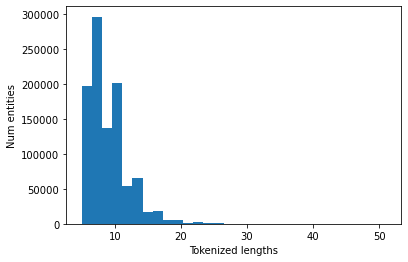

In [40]:
import matplotlib.pyplot as plt 

import numpy as np 

%matplotlib inline

# x = np.random.normal(size = 1000) 
x = lengths
plt.hist(x, bins=30) 

plt.ylabel('Num entities');
plt.xlabel('Tokenized lengths')

In [107]:
input1 = 'predict head: obama | position held |'
input2 = 'predict tail: f | f |'
out = sp.encode([input1, input2])
for x in out:
    x.append(sp['</s>'])
length = max(map(len, out))
y = np.array([xi+[sp['<pad>']]*(length-len(xi)) for xi in out])
y

array([[    5,     7,     4, 21171,     3,    88,   257,     3,     2],
       [    5,     8,     4,    68,     3,    68,     3,     2,     0]])

In [96]:
lengths = [len(x) for x in out]
lengths

[9, 8]

In [100]:
max_len = max(lengths)
attention_mask = np.zeros((len(lengths), max_len), dtype=np.long)
for i, l in enumerate(lengths):
    attention_mask[i][:l] = np.ones((l), dtype=np.long)
attention_mask

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0]])

In [117]:
import torch
x = torch.LongTensor(y)
x

tensor([[    5,     7,     4, 21171,     3,    88,   257,     3,     2],
        [    5,     8,     4,    68,     3,    68,     3,     2,     0]])

In [119]:
sp.decode([0, 0, 0])

' ⁇  ⁇  ⁇ '

In [81]:
import numpy as np
lengths = [len(x) for x in out]
max_len = max(lengths)
# np.pad(out, (1,1))
x = np.zeros((len(out), max_len), dtype=np.long)
x[0] = out[0]
x[1][:lengths[1]] = out[1]

In [116]:
x = sp.encode('hello f')
x.append(sp['</s>'])
x = np.array(x)
x = x.tolist()
print(x)
sp.decode(x)

[8318, 68, 2]


'hello f'

In [41]:
for _ in range(5):
    x = sp.encode('predict head: obama | position held |', out_type=str, enable_sampling=True, alpha=0.5, nbest_size=-1)
    print(x)

['▁predict', '▁head', ':', '▁obama', '▁|', '▁position', '▁held', '▁|']
['▁predict', '▁head', ':', '▁obama', '▁|', '▁position', '▁held', '▁|']
['▁predict', '▁head', ':', '▁obama', '▁|', '▁position', '▁hel', 'd', '▁|']
['▁predict', '▁head', ':', '▁obama', '▁|', '▁position', '▁held', '▁|']
['▁predict', '▁head', ':', '▁ob', 'ama', '▁|', '▁position', '▁held', '▁|']


In [3]:
import os
from transformers import XLMTokenizer
from transformers import PreTrainedTokenizer
from transformers import GPT2Tokenizer

def saveBPETokenizer(tokenizer, prefix):
    # make directory for tokenizer
    path = os.path.join('data/bpe', prefix)
    if not os.path.exists(path):
        os.mkdir(path)
    # save + load data
    main_fname = 'data/bpe/{}/main.json'.format(prefix)
    tokenizer.save(main_fname)
    f = open(main_fname, 'r')
    data = json.load(f)
    f.close()
    #save data in format required by transformers.PretrainedTokenizer
    vocab_fname = 'data/bpe/{}/vocab.json'.format(prefix)
    merges_fname = 'data/bpe/{}/merges.txt'.format(prefix)
    json_object = json.dumps(data['model']['vocab'])
    with open(vocab_fname, "w") as outfile:
        outfile.write(json_object)
    f = open(merges_fname, 'w')
    for x in data['model']['merges']:
        f.write(x +'\n')
    f.close()
    print('Saved')
    
def saveWordPieceTokenizer(tokenizer, prefix):
    # make directory for tokenizer
    path = os.path.join('data/wordpiece', prefix)
    if not os.path.exists(path):
        os.mkdir(path)
    # save + load data
    main_fname = 'data/wordpiece/{}/main.json'.format(prefix)
    tokenizer.save(main_fname)
    print('Saved')



def loadBPETokenizer(prefix):
    vocab_fname = 'data/bpe/{}/vocab.json'.format(prefix)
    merges_fname = 'data/bpe/{}/merges.txt'.format(prefix)
#     tokenizer = XLMTokenizer(vocab_file=vocab_fname, merges_file=merges_fname)
    tokenizer = GPT2Tokenizer(vocab_file=vocab_fname, merges_file=merges_fname, 
                              unk_token='<unk>', 
                              bos_token='<s>', 
                              eos_token='</s>', 
                              add_prefix_space=True)
    return tokenizer

In [4]:
# saveBPETokenizer(tokenizer, 'codexm{}'.format(vocab_size))
saveWordPieceTokenizer(tokenizer, 'wikidata5m_{}'.format(vocab_size))

Saved


In [6]:
# text = train_data[0]
text = 'hello world'
tokenizer.encode_batch(["predict tail: obama | united states of america |", "How are you 😁 ?", text])

[Encoding(num_tokens=10, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing]),
 Encoding(num_tokens=5, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing]),
 Encoding(num_tokens=2, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])]

In [7]:
text = 'hello world  </s>'
tokenizer.enable_padding(pad_id=2, pad_token="<pad>")
x = tokenizer.encode_batch(["Hello, y'all!", "How are you 😁 ?", text])
x[2].tokens

['hello', 'world', '</s>', '<pad>', '<pad>', '<pad>']

In [12]:
x = tokenizer.encode('predict relation: obama | united states of america | </s>').ids
y = tokenizer.encode('fsadlk jfasdkf jsadlkfjas lkdjf').ids
out = tokenizer.decode_batch([x,y], skip_special_tokens=True)
# for x in out:
#     x = x.replace(' ##', '')
#     print(x)

In [8]:
y = tokenizer.encode('predict tail: obama | united states of america | </s>')
y.tokens

['predict',
 'tail',
 ':',
 'obama',
 '|',
 'united',
 'states',
 'of',
 'america',
 '|',
 '</s>']

In [236]:
tokenizer.encode('<pad>').ids[0]

2

In [209]:
tk = loadBPETokenizer('codexm{}'.format(vocab_size))

In [210]:
text = ' hello world'

In [270]:
tokenized = tk(text, truncation=True, max_length=128, return_tensors="pt")
# tokenized_ids = [0 if token == None else token for token in tokenized.input_ids]
# ''.join(tk.convert_ids_to_tokens(tokenized_ids))

In [59]:
t5tk.pad_token_id

0

In [277]:
import numpy as np
x = [1,2,3,4]
x = np.array(x)
np.stack([x,x])

array([[1, 2, 3, 4],
       [1, 2, 3, 4]])

In [259]:
from transformers import BatchEncoding
da = {}
da['input_ids'] = x.input_ids
da['attention_mask'] = x.attention_mask
da2 = BatchEncoding(da)
da2.input_ids

[3,
 65,
 42,
 36,
 53,
 3,
 77,
 31,
 3,
 34,
 3,
 1115,
 56,
 3,
 1587,
 3,
 617,
 3,
 60,
 3,
 193,
 3,
 111,
 3,
 60,
 3,
 554,
 3,
 777,
 107,
 122,
 211]

In [118]:
train_data = []
fname = 'data/codex-m/train.txt'
f = open(fname, 'r')
for line in f:
    train_data.append(line.strip())

In [197]:
tk.unk_token 

'<unk>'

In [20]:
import json
  
# Opening JSON file
fname = "data/tokenizer-codexm-2k.json"
f = open(fname, 'r')
  
# returns JSON object as 
# a dictionary
data = json.load(f)


In [22]:
kwargs = {
    'pretrained_vocab_files_map ': data
}


In [26]:
# tokenizer =  XLMTokenizer(vocab_file='vocab.json', merges_file='merges.txt')

Calling PreTrainedTokenizer.from_pretrained() with the path to a single file or url is deprecated


IndexError: list index out of range

In [88]:
xlmtk = XLMTokenizer.from_pretrained('xlm-mlm-en-2048')

In [89]:
xlmtk.convert_ids_to_tokens([0,1,2,3,4,5,6,7,8])

['<s>',
 '</s>',
 '<pad>',
 '<unk>',
 '<special0>',
 '<special1>',
 '<special2>',
 '<special3>',
 '<special4>']

In [90]:
xlmtk.special_tokens

AttributeError: 'XLMTokenizer' object has no attribute 'special_tokens'

In [74]:
mytk = XLMTokenizer(vocab_file='vocab.json', merges_file='merges.txt')

In [75]:
mytk.convert_ids_to_tokens([0,1,2,3,4,5])

['<unk>', '<s>', '</s>', '<pad>', '<mask>', '!']

In [33]:
tokenizer.save('data/bpe', 'codexm2k')


TypeError: Can't convert 'codexm2k' to PyBool

In [34]:
tokenizer.save

<function Tokenizer.save(self, pretty=False)>

In [39]:
f = open('merges.txt', 'w')
for x in data['model']['merges']:
    f.write(x +'\n')
f.close()

In [42]:
from transformers import XLMTokenizer

In [44]:
tk2 = XLMTokenizer(vocab_file='vocab.json', merges_file='merges.txt')

In [45]:
tk2.vocab_size

2000

In [29]:
from transformers import T5Tokenizer

In [30]:
t5tk = T5Tokenizer.from_pretrained('t5-small')

In [60]:
t5tk.convert_tokens_to_ids('<e>')

2

In [35]:
t5tk('hello <s>')

{'input_ids': [21820, 3, 2, 7, 3155, 1], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [76]:
t5tk.convert_ids_to_tokens([0,1,2,3,4,5])

['<pad>', '</s>', '<unk>', '▁', 'X', '.']